In [102]:
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Load Diabetes dataset ###

In [103]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [104]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [105]:
df.describe()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [106]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df)

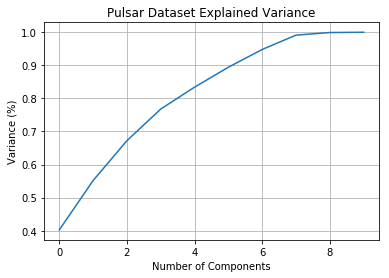

In [107]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(df)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.grid(True)
plt.show()

In [108]:
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3',
                          'principal component 4','principal component 5','principal component 6','principal component 7'])
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,0.027931,-0.092601,0.028027,-0.003939,-0.012207,-0.048099,-0.008553
1,-0.134686,0.065263,0.001328,-0.022356,-0.006813,-0.048184,0.010674
2,0.012945,-0.077764,0.035164,-0.037647,-0.055357,-0.052931,-0.021994
3,0.002345,0.018182,-0.095750,0.065318,0.012154,0.021181,0.022933
4,-0.035981,0.038621,-0.002724,-0.006541,-0.006343,-0.038746,0.020760


In [109]:
df = StandardScaler().fit_transform(principalDf)


__Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.__

In [110]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 7) (353,)
(89, 7) (89,)


In [116]:
# fit a model
lm = linear_model.LinearRegression()
model= lm.fit(X_train, y_train)
prediction= model.predict(X_test)
print(round(model.score(X_test,y_test)*100,2))
# confusion_matrix(y_test,pred)

46.56


Text(0, 0.5, 'Prediction')

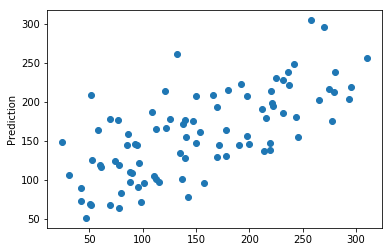

In [117]:
## The line / model
plt.scatter(y_test, prediction)
# plt.xlabel('True Values')
plt.ylabel('Prediction')

__We can perform something called cross validation. It’s very similar to train/test split, but it’s applied to more subsets. I’ll use the cross_val_predict function to return the predicted values for each data point when it’s in the testing slice.__

In [118]:
#Perform 6-fold cross validation
round(cross_val_score(model,df, y, cv=6).mean()*100,2)

48.11

__As you can see, the last fold improved the score of the original model — from 0.485 to 0.569. Not an amazing result, but we’ll take what we can get.
Now, let’s plot the new predictions, after performing cross validation.__


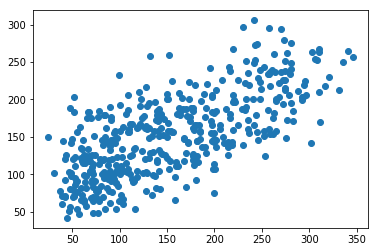

In [115]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)